In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import timeit
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,15)
ds = sio.loadmat('face.mat')

In [2]:
X = ds['X']
l = ds['l'][0]
split = 0.8
W = 46
H = 56
IDs = 52
X = pd.DataFrame(X.transpose())
N = X.shape[0]*split
l = pd.DataFrame(l)

In [3]:
X_train, X_test, l_train, l_test = train_test_split(X, l, test_size=(1-split))
# X_bar = np.mean(X, axis=1)
X_train, X_test = X_train.values, X_test.values
X_bar = np.mean(X_train, axis=0)
X_train = np.subtract(X_train,X_bar)
X_test = np.subtract(X_test,X_bar)
l_train, l_test = l_train.values, np.transpose(l_test.values)

In [4]:
train_subspaces = []
for i in range(IDs):
    images = []
    for j in range(int(N)):
        if l_train[j][0] == i+1:
            images.append(X_train[j])
    train_subspaces.append(images)

In [5]:
eigen_subspaces = []
for i in range(IDs):
    elements = np.asarray(train_subspaces[i])
    S = np.matmul(elements,np.transpose(elements))
    w, v = np.linalg.eig(S)
    U = preprocessing.normalize(np.matmul(np.transpose(elements),v), axis=0)
    eigen_subspaces.append(U)

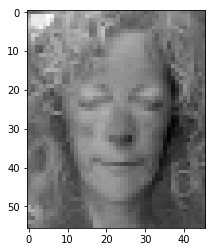

In [6]:
img = X_test[1]
plt.imshow(np.transpose(np.array_split(img,W)), cmap='gray')

In [7]:
correct = 0
for j in range(len(l_test[0])):
    error = []
    for i in range(IDs):
        test_img = X_test[j]
        identity = np.matmul(test_img,eigen_subspaces[i])
        recon = np.matmul(identity, np.transpose(eigen_subspaces[i]))+X_bar
        diff = X_test[j]-recon
        error.append(np.matmul(diff,np.transpose(diff)))
    guess = np.argmin(error)+1
    if guess == l_test[0][j]:
        correct += 1
#         else:
#             print(str(guess)+','+str(l_test[0][j]))
print(len(l_test[0]))
print('Correct = '+str(round(100*correct/len(l_test[0]),2))+'%')

104
Correct = 16.35%
